# Examine Results

In [395]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom_test, chi2_contingency
import seaborn as sns

from convnwb.paths import Paths
from convnwb.io import get_files, load_json, load_jsons_to_df, load_matfile

from spiketools.plts.data import plot_hist, plot_bar
from spiketools.plts.utils import make_axes, save_figure
from spiketools.plts.annotate import add_hlines

In [396]:
import seaborn as sns
sns.set_context('talk')

In [397]:
# Set pandas display options
pd.options.display.max_columns = None

## Settings

In [468]:
# Set which experiment version to run
experiment = 'THO'

In [469]:
# Define list of analyses
th_analyses = [#'allchest', 'fullchest', 'emptychest',
               'chest', 'place', 'target', 'serial']

# Collect names of analysis columns
th_analysis_columns = ['is_' + analysis for analysis in th_analyses]

In [470]:
# Set the folder to load results from
data_path = '../results/units/' + experiment

## Check Files

In [471]:
# Get the list of files
res_files = get_files(data_path, select='session')

In [472]:
# # Drop a specific set of files
# res_files = [file for file in res_files if 'wv003' not in file]

In [473]:
# # Select a specific set of files
# res_files = [file for file in res_files if 'wv001' in file]

In [474]:
# Check the number of available files
n_files = len(res_files)
n_files

608

## Load Example File

In [475]:
# Load an example file
file = res_files[0]
data = load_json(file, folder=str(data_path))

In [476]:
# # Check example file
# data

## Collect Results

In [477]:
# Collect all unit results together into a dataframe
all_results = load_jsons_to_df(res_files, folder=data_path)

In [478]:
# # Clean up some datatypes - cast integers
# set_ints = ['uid', 'wvID', 'keep', 'cluster', 'n_spikes']
# all_results[set_ints] = all_results[set_ints].astype('int')

In [479]:
# Check the columns
all_results.columns

Index(['uid', 'session_id', 'subject_id', 'wvID', 'keep', 'n_spikes',
       'firing_rate', 'presence_ratio', 'cluster', 'channel', 'location',
       'fr_t_val_all', 'fr_p_val_all', 'fr_t_val_empt', 'fr_p_val_empt',
       'fr_t_val_full', 'fr_p_val_full', 'place_anova', 'target_anova',
       'serial_anova', 'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'target_anova_surr_p_val', 'target_anova_surr_z_score',
       'serial_anova_surr_p_val', 'serial_anova_surr_z_score'],
      dtype='object')

In [480]:
# Check the head of the results
all_results.head()

,uid,session_id,subject_id,wvID,keep,n_spikes,firing_rate,presence_ratio,cluster,channel,location,fr_t_val_all,fr_p_val_all,fr_t_val_empt,fr_p_val_empt,fr_t_val_full,fr_p_val_full,place_anova,target_anova,serial_anova,place_anova_surr_p_val,place_anova_surr_z_score,target_anova_surr_p_val,target_anova_surr_z_score,serial_anova_surr_p_val,serial_anova_surr_z_score
0,0,THO_wv001_session_0,wv001,1,True,595,0.402114,0.821918,5169,A10,LAH,0.096174,0.923585,-0.627103,0.534661,0.607628,0.545766,0.536361,0.511021,0.676014,0.856,-0.842366,0.856,-0.938975,0.607,-0.427371
1,2,THO_wv001_session_0,wv001,3,True,22559,15.259095,1.000000,5200,A10,LAH,0.532078,0.595914,1.401202,0.169959,-0.540276,0.591040,1.205246,2.266768,1.098669,0.287,0.404469,0.040,2.090485,0.381,0.009386
2,3,THO_wv001_session_0,wv001,4,True,4583,3.115527,1.000000,5203,A10,LAH,1.323994,0.188682,0.117595,0.907061,1.616886,0.111238,1.488245,1.687129,2.034143,0.134,1.117659,0.158,1.002798,0.091,1.325692
3,4,THO_wv001_session_0,wv001,5,True,990,0.675442,0.958904,2248,A12,LAH,0.000000,1.000000,-0.597614,0.553945,0.433472,0.666253,0.362834,0.788821,0.686159,0.973,-1.240125,0.623,-0.458876,0.630,-0.475896
4,5,THO_wv001_session_0,wv001,6,True,5965,4.060187,1.000000,2303,A12,LAH,-1.315754,0.191423,0.828417,0.413048,-2.313347,0.024208,0.553021,1.297559,0.678876,0.868,-0.972511,0.210,0.723683,0.417,-0.035455


### Unit Checks

In [481]:
# Firing rate threshold checks
print('# neurons fr < 0.15: \t', sum(all_results.firing_rate < 0.15))
print('# neurons fr < 0.50: \t', sum(all_results.firing_rate < 0.50))

# neurons fr < 0.15: 	 43
# neurons fr < 0.50: 	 188


In [482]:
# # Plot the distribution of firing rates
# plot_hist(all_results['firing_rate'].values)

In [483]:
# Add a marker for firing rate threshold in the TH experiment
all_results['keep_th'] = (all_results['firing_rate'] > 0.15).values

In [484]:
#
all_results = all_results[all_results['keep_th']]

In [485]:
# Check number of neurons
n_units = len(all_results)
print('# neurons: ', n_units)

# neurons:  565


### Location Checks

In [486]:
# Check the set of sampled locations
locations = set(all_results['location'])
locations

{'LA', 'LAH', 'LPH', 'RA', 'RAH', 'RPH'}

In [487]:
# Check location counts
all_results['location'].value_counts()

LA     234
LPH    116
LAH     79
RA      72
RAH     34
RPH     30
Name: location, dtype: int64

<AxesSubplot:>

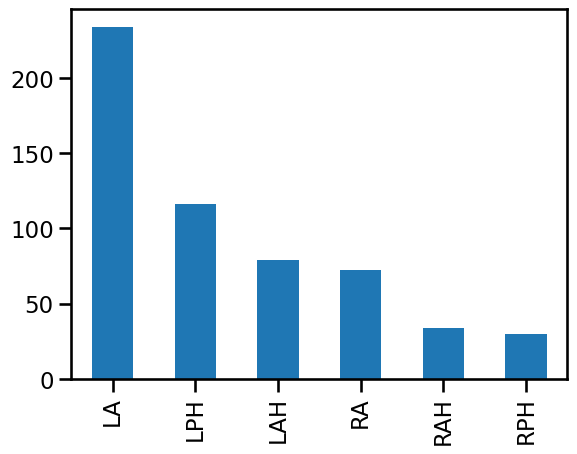

In [488]:
# Plot the counts per location
all_results['location'].value_counts().plot(kind='bar')

In [489]:
# Define location map
locmap = {'LA' : 'AMY',
          'RA' : 'AMY',
          'LAH' : 'AH',
          'RAH' : 'AH',
          'LPH' : 'PH',
          'RPH' : 'PH'}

In [490]:
# Set and collect which area each unit it is
all_results['region'] = all_results['location'].map(locmap)

In [491]:
# Check area counts
all_results['region'].value_counts()

AMY    306
PH     146
AH     113
Name: region, dtype: int64

<AxesSubplot:>

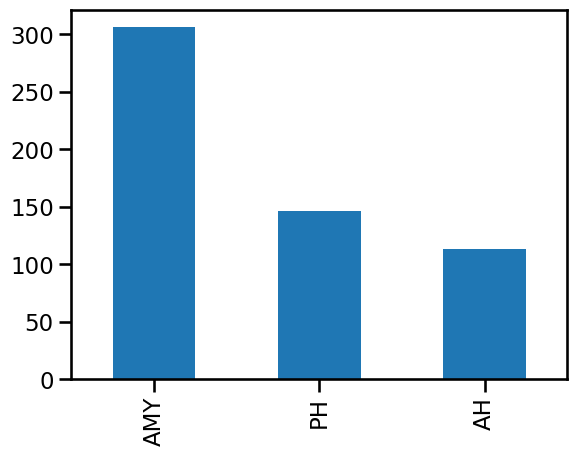

In [492]:
# Plot the counts per area
all_results['region'].value_counts().plot(kind='bar')

In [493]:
# Check the set of sampled areas
regions = set(all_results['region'])
regions

{'AH', 'AMY', 'PH'}

### Binary labels

In [494]:
# Set significance level
ALPHA_LEVEL = 0.05

In [495]:
# Add binary labels for statistical tests
#all_results['is_allchest'] = all_results['fr_p_val_all'] < ALPHA_LEVEL
all_results['is_chest'] = all_results['fr_p_val_full'] < ALPHA_LEVEL
#all_results['is_emptychest'] = all_results['fr_p_val_empt'] < ALPHA_LEVEL
all_results['is_place'] = all_results['place_anova_surr_p_val'] < ALPHA_LEVEL
all_results['is_target'] = all_results['target_anova_surr_p_val'] < ALPHA_LEVEL
all_results['is_serial'] = all_results['serial_anova_surr_p_val'] < ALPHA_LEVEL

### Check numbers

In [496]:
# # Check the total number of cells
# print('Total number of cells: {}'.format(n_files))

## Check Results

In [497]:
# Get total number of units
n_units = len(all_results)

In [498]:
# Collect numbers of significant cells
results = {}
for analysis in th_analyses:
    results[analysis] = sum(all_results['is_' + analysis])

In [499]:
# Compute significance of the counts of detected neurons
stats = {}
for analysis in th_analyses:
    stats[analysis] = binom_test(results[analysis], n_units, ALPHA_LEVEL)

/home1/tom.donoghue/.conda/envs/thproj/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [500]:
# Check the number & percent of significant cells per analysis
print('{} - total cells: {}\n'.format(experiment, n_units))
for analysis in th_analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

THO - total cells: 565

# chest cells:     		 61  (10.80%) 		 0.0000
# place cells:     		 28  ( 4.96%) 		 1.0000
# target cells:     		 40  ( 7.08%) 		 0.0328
# serial cells:     		 77  (13.63%) 		 0.0000


## Save out results

In [501]:
# Save out of CSV
#all_results.to_csv(experiment + '_all_results.csv')

In [502]:
# # TEMP - SAVE DF
# all_results.to_csv(experiment + '_all_results_nov3.csv')

## Check Results by Subject / Session

In [503]:
# Check the number of detected cells per subject
pd.pivot_table(all_results, th_analysis_columns, index='subject_id', aggfunc=np.sum)

,is_chest,is_place,is_serial,is_target
subject_id,,,,
wv001,14,8,19,8
wv002,6,2,12,10
wv003,4,1,3,2
wv004,36,16,38,18
wv005,1,1,5,2


In [504]:
# Check the number of detected cells per session
pd.pivot_table(all_results, th_analysis_columns, index=['subject_id', 'session_id'], aggfunc=np.sum)

is_chest  is_place  is_serial  is_target
subject_id session_id                                                   
wv001      THO_wv001_session_0         5         1          7          2
           THO_wv001_session_2         9         7         12          6
wv002      THO_wv002_session_0         1         0          1          1
           THO_wv002_session_1         4         1         10          4
           THO_wv002_session_2         1         1          1          5
wv003      THO_wv003_session_0         1         0          0          2
           THO_wv003_session_1         3         1          3          0
wv004      THO_wv004_session_0        18         5         19          5
           THO_wv004_session_1         6         4          5          7
           THO_wv004_session_2         5         4          3          1
           THO_wv004_session_3         7         3         11          5
wv005      THO_wv005_session_0         1         1          5          2

## Check Correlations

In [505]:
# Check correlation within / between real data measures and firing rate
cols = ['fr_t_val_full', 'fr_t_val_all', 'fr_t_val_empt',
        'target_anova', 'serial_anova', 'firing_rate']
extracted = all_results[cols]
extracted.corr()

,fr_t_val_full,fr_t_val_all,fr_t_val_empt,target_anova,serial_anova,firing_rate
fr_t_val_full,1.000000,0.872368,0.191501,-0.014463,-0.067919,0.070443
fr_t_val_all,0.872368,1.000000,0.639775,0.002627,-0.064521,0.079217
fr_t_val_empt,0.191501,0.639775,1.000000,0.025653,-0.019955,0.045008
target_anova,-0.014463,0.002627,0.025653,1.000000,0.068938,0.015823
serial_anova,-0.067919,-0.064521,-0.019955,0.068938,1.000000,0.115191
firing_rate,0.070443,0.079217,0.045008,0.015823,0.115191,1.000000


In [506]:
# Check correlation within / between surrogate data measures and firing rate
cols = ['target_anova_surr_z_score', 'target_anova_surr_p_val',
        'serial_anova_surr_z_score', 'serial_anova_surr_p_val', 
        'firing_rate']
extracted = all_results[cols]
extracted.corr()

,target_anova_surr_z_score,target_anova_surr_p_val,serial_anova_surr_z_score,serial_anova_surr_p_val,firing_rate
target_anova_surr_z_score,1.000000,-0.928980,0.038215,-0.028085,0.038422
target_anova_surr_p_val,-0.928980,1.000000,-0.059818,0.039731,-0.007232
serial_anova_surr_z_score,0.038215,-0.059818,1.000000,-0.810542,0.131348
serial_anova_surr_p_val,-0.028085,0.039731,-0.810542,1.000000,-0.147876
firing_rate,0.038422,-0.007232,0.131348,-0.147876,1.000000


## Results by Area

Analyze the results split up by area

Anatomical organization:
- 'region': a brain region, collapsing across left & right
- 'location': a specific location, split up by left & right

In [507]:
# Collect different area organizations together
places = {'region' : regions,
          'location' : locations}

In [508]:
# Define which area organization to use
place = 'region'

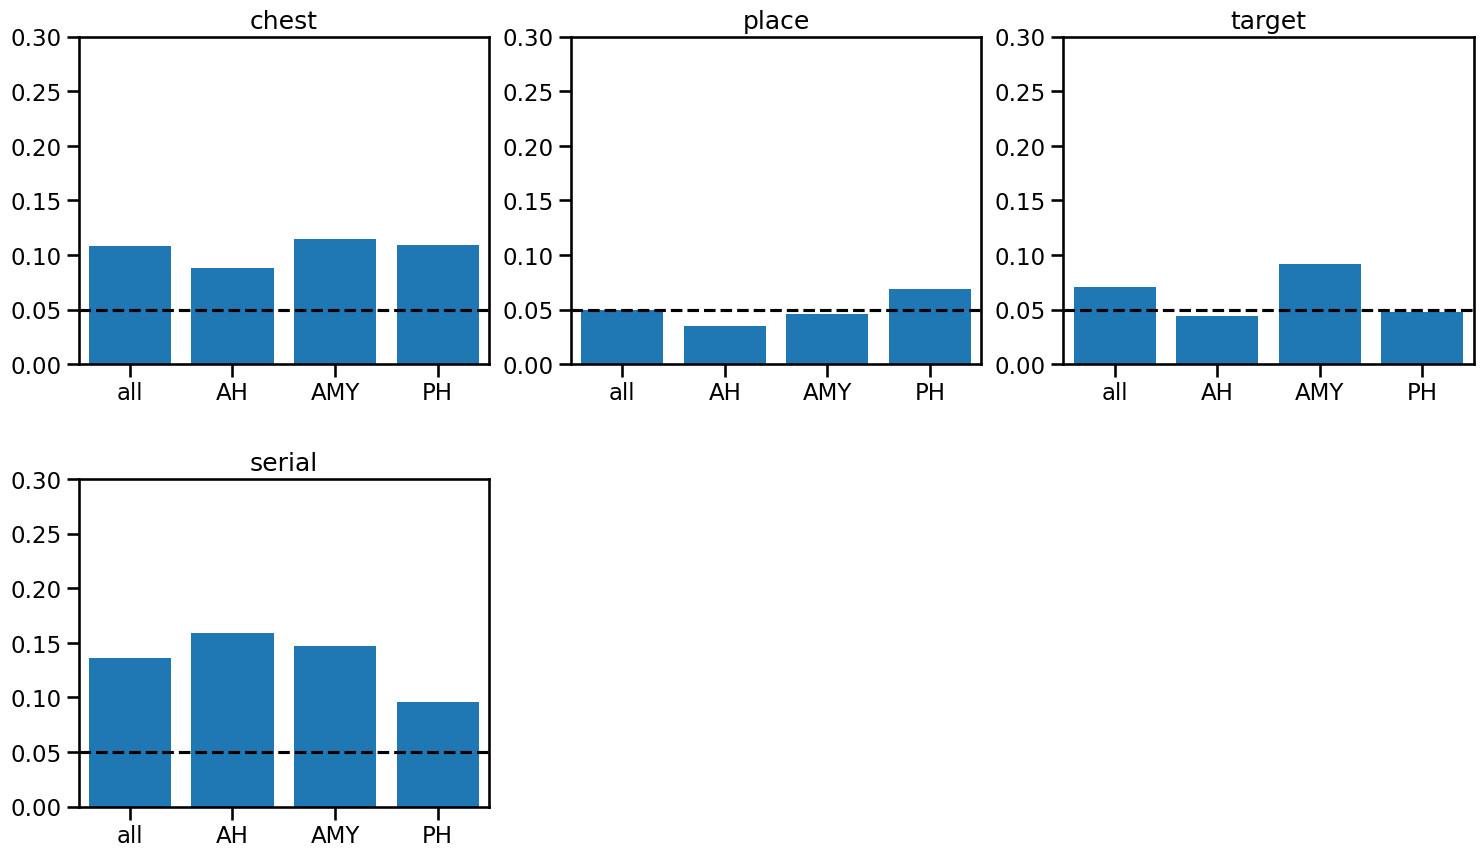

In [509]:
axes = make_axes(len(th_analyses), 3, hspace=0.35, figsize=(18, 10))
for analysis, ax in zip(th_analyses, axes):

    out = {}
    out['all'] = results[analysis] / n_units

    for value in places[place]:
        temp = all_results[all_results[place] == value]
        out[value] = sum(temp['is_' + analysis]) / len(temp)

    plot_bar(out.values(), out.keys(), title=analysis, ylim=[0, 0.30], ax=ax)
    add_hlines(0.05, linestyle='--', color='black', ax=ax)

## Within Task Overlap

Compute the overlap of labels within TH task

In [510]:
# Compute overlap between labels within TH task
over = np.zeros([len(th_analysis_columns), len(th_analysis_columns)])
for i1, acol1 in enumerate(th_analysis_columns):
    a1res = set(all_results[all_results[acol1]].wvID.values)
    
    for i2, acol2 in enumerate(th_analysis_columns):
        a2res = set(all_results[all_results[acol2]].wvID.values)
        
        over[i1, i2] = len(a1res.intersection(a2res)) / len(a1res)

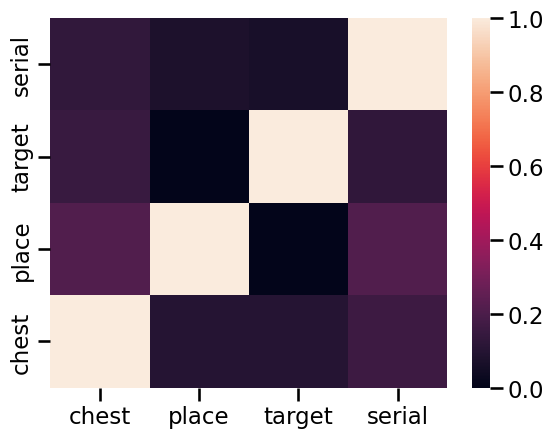

In [511]:
# Plot the overlap between TH labels
ax = sns.heatmap(over, xticklabels=th_analyses, yticklabels=th_analyses)
ax.invert_yaxis()

## Distributions

In [512]:
# Plot settings
bins = 35

### Chest Measures

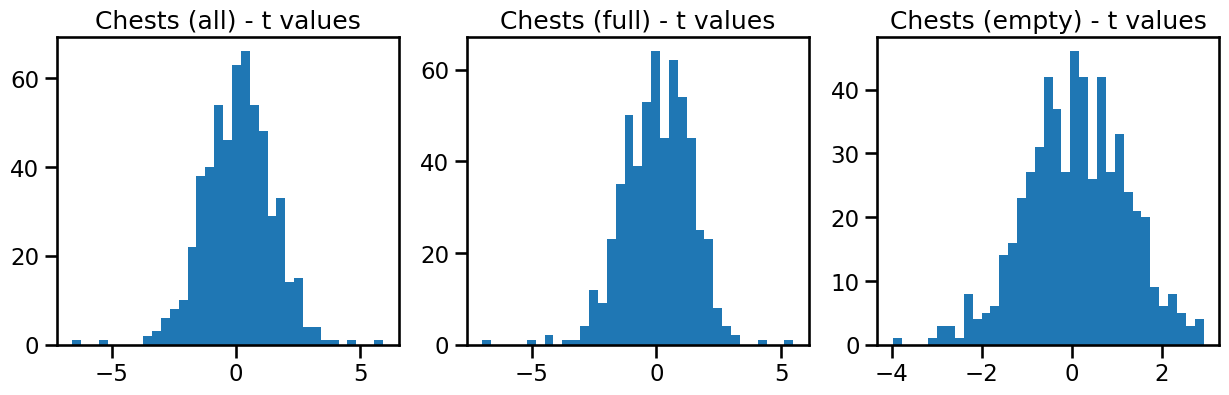

In [513]:
# Plot t-values of the chest measures
axes = make_axes(3, 3, figsize=(15, 4))
plot_hist(all_results.fr_t_val_all.values, title='Chests (all) - t values', bins=bins, ax=axes[0])
plot_hist(all_results.fr_t_val_full.values, title='Chests (full) - t values', bins=bins, ax=axes[1])
plot_hist(all_results.fr_t_val_empt.values, title='Chests (empty) - t values', bins=bins, ax=axes[2])

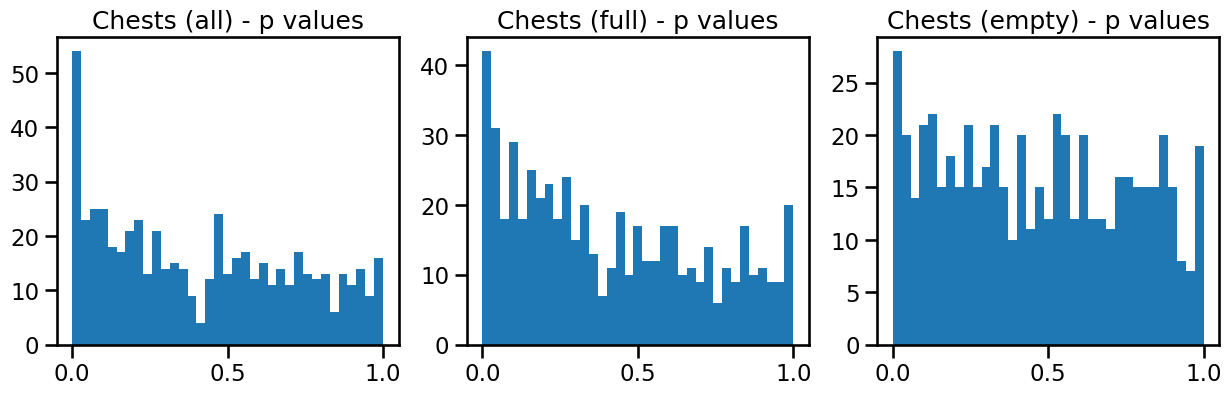

In [514]:
# Plot p-values of the chest measures
axes = make_axes(3, 3, figsize=(15, 4))
plot_hist(all_results.fr_p_val_all.values, title='Chests (all) - p values', bins=bins, ax=axes[0])
plot_hist(all_results.fr_p_val_full.values, title='Chests (full) - p values', bins=bins, ax=axes[1])
plot_hist(all_results.fr_p_val_empt.values, title='Chests (empty) - p values', bins=bins, ax=axes[2])

### Position & Sequence Measures

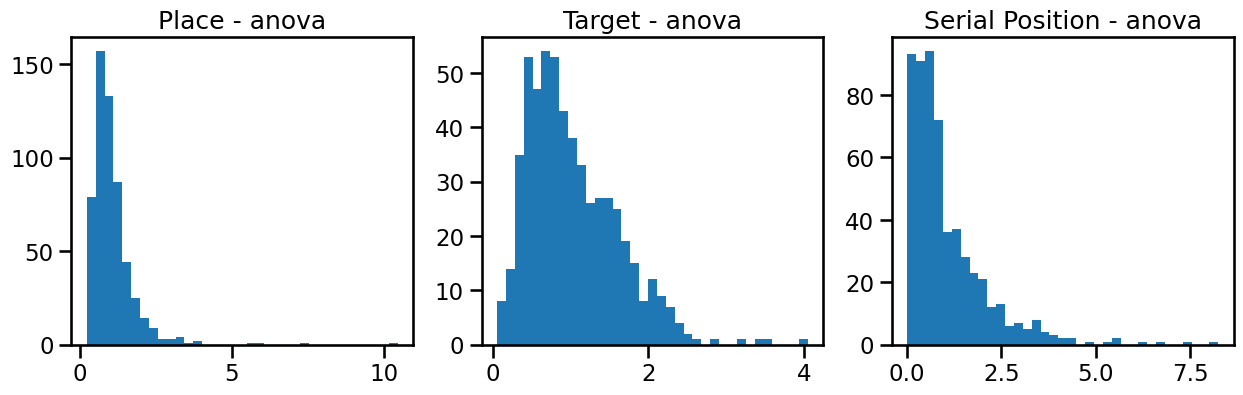

In [515]:
# Plot measure values of the position & sequence measures
axes = make_axes(3, 3, figsize=(15, 4), hspace=0.35)
plot_hist(all_results.place_anova.values, title='Place - anova', bins=bins, ax=axes[0])
plot_hist(all_results.target_anova.values, title='Target - anova', bins=bins, ax=axes[1])
plot_hist(all_results.serial_anova.values, title='Serial Position - anova', bins=bins, ax=axes[2])

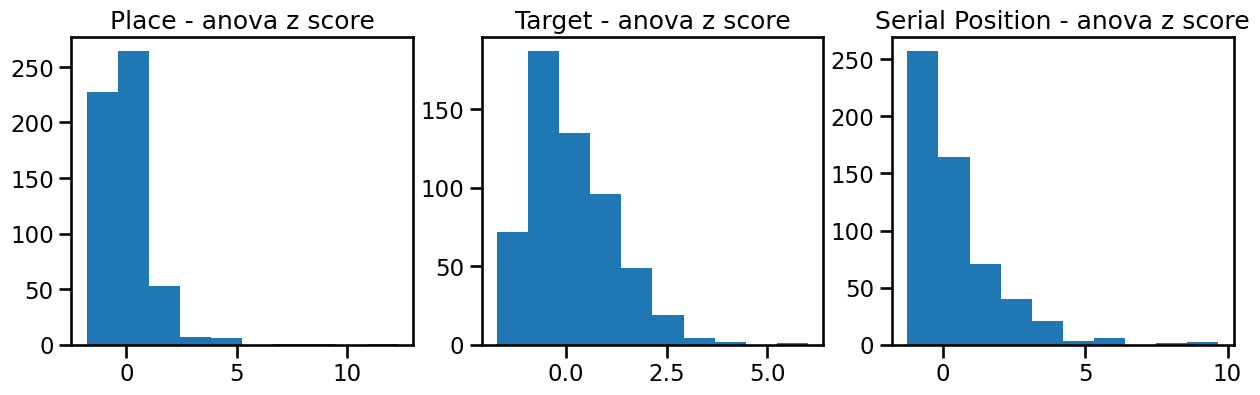

In [516]:
# Plot surrogate z-scores of the position & sequence measures
axes = make_axes(3, 3, figsize=(15, 4), hspace=0.35)
plot_hist(all_results.place_anova_surr_z_score.values, title='Place - anova z score', ax=axes[0])
plot_hist(all_results.target_anova_surr_z_score.values, title='Target - anova z score', ax=axes[1])
plot_hist(all_results.serial_anova_surr_z_score.values, title='Serial Position - anova z score', ax=axes[2])

In [517]:
#bins=50

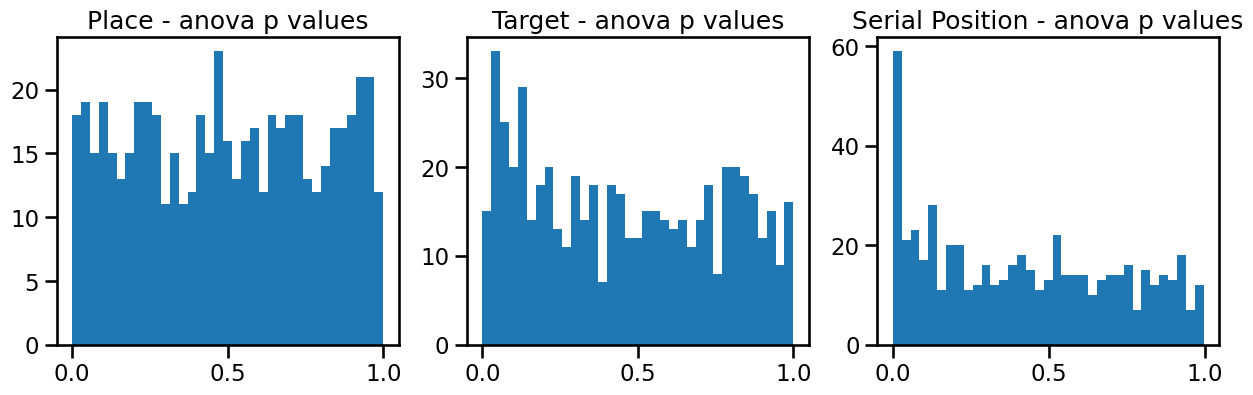

In [518]:
# Plot p values of the position & sequence measures
axes = make_axes(3, 3, figsize=(15, 4), hspace=0.35)
plot_hist(all_results.place_anova_surr_p_val.values, title='Place - anova p values', bins=bins, ax=axes[0])
plot_hist(all_results.target_anova_surr_p_val.values, title='Target - anova p values', bins=bins, ax=axes[1])
plot_hist(all_results.serial_anova_surr_p_val.values, title='Serial Position - anova p values', bins=bins, ax=axes[2])

## Task Overlap Analysis

In [519]:
# Define base project path
project_path = '/data12/jacobs_lab/WVTH/'

In [520]:
# Create paths object
paths = Paths(project_path)

### Identity Neuron

Identity neuron fields:
- ID_neuron: identity neuron
- MI_neuron: multiple identity neuron
- SI_neuron: single identity neuron

In [521]:
# Define the file path for the relevant nback results file
if experiment == 'THF':
    id_file_name = 'ID neuron CelebA_NavSelect MeanResponse 2SD.mat'
if experiment == 'THO':
    id_file_name = 'ID neuron ImageNet_NavSelect MeanResponse 2SD.mat'

In [522]:
# Load nback results data
nback_data = load_matfile(id_file_name, folder=paths.info / 'nback', squeeze_me=True)

In [523]:
# Check the available keys in the loaded nback data
keys = [key for key in nback_data.keys() if key[0] != '_']
keys

['CodeID', 'CodeIDNum', 'ID_neuron', 'MI_neuron', 'SI_neuron', 'selMethod']

### Baseline firing

In [524]:
# Define the file path for the relevant nback results file
if experiment == 'THF':
    file_name = 'SortedFRCelebA_Nav.mat'
if experiment == 'THO':
    file_name = 'SortedFRImageNet_Nav.mat'

In [525]:
# Load the data file
fr_data = load_matfile(file_name, folder=paths.info / 'nback', squeeze_me=True)

In [526]:
# Check the available keys in the metadata file
print([el for el in fr_data.keys() if el[0] != '_'])

['FR', 'FR_sort', 'areaCell', 'beh', 'binStep', 'binW', 'pAnova', 'pBase', 'periodsAll', 'sessions', 'timestampsOfCellAll', 'vAnova', 'vBase', 'vCell', 'vCh', 'vClusterID', 'vImg', 'vKeep', 'vReject', 'vWire']


In [527]:
# Add the baseline response firing analysis to collection of analyses
nback_data['vBase'] = fr_data['vBase']

#### Overlap Within nBack

In [528]:
# Define list of nback analyses
nback_analyses = ['ID_neuron', 'MI_neuron', 'SI_neuron', 'vBase']

In [529]:
# Compute overlap between labels within nBack task
over = np.zeros([len(nback_analyses), len(nback_analyses)])
for i1, acol1 in enumerate(nback_analyses):
    a1res = set(nback_data[acol1])
    
    for i2, acol2 in enumerate(nback_analyses):
        a2res = set(nback_data[acol2])
        
        over[i1, i2] = len(a1res.intersection(a2res)) / len(a1res)

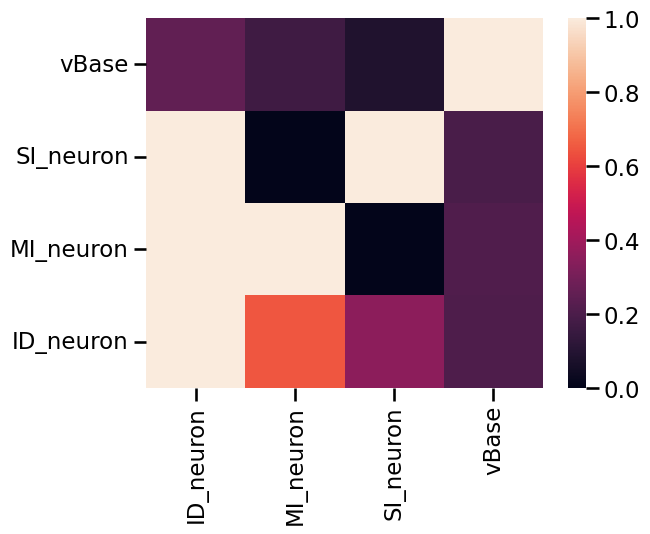

In [530]:
# Plot the overlap between nBack labels
ax = sns.heatmap(over, xticklabels=nback_analyses, yticklabels=nback_analyses)
ax.invert_yaxis()

# Compute Between Task Overlap

In [531]:
# Set which nBack analysis to compare to
nb_analysis = 'base'  # 'base', 'ID'

In [532]:
if nb_analysis == 'ID':
    nb_data = nback_data['ID_neuron']
    #nb_data = nback_data['SI_neuron']
if nb_analysis == 'base':
    nb_data = nback_data['vBase']

In [533]:
print(experiment, ' - ', nb_analysis, '\n')
print('\t {} \t {} \t {} \t {} \t\t {} \t\t{}'.format('#NB', '#TH', '#Over', '%Over', 'pval', 'exp'))
for analysis in th_analyses:

    th_data = all_results[all_results['is_' + analysis]].wvID.values
    n_th = len(th_data)

    n_nb = len(nb_data)
    
    inter = len(set(th_data).intersection(set(nb_data)))
    
    arr = np.array([[inter, n_th-inter],
                    [n_nb-inter, n_units-n_th-n_nb+inter]])
    tstat, pval, dof, exp = chi2_contingency(arr, False)

    print('{} \t {} \t {} \t {} \t {:5.2f}% \t {:5.4f} \t {:2d}'.format(\
        analysis, n_nb, n_th, inter, (inter / n_nb) * 100, pval, round(exp[0][0])))

THO  -  base 

	 #NB 	 #TH 	 #Over 	 %Over 		 pval 		exp
chest 	 72 	 61 	 15 	 20.83% 	 0.0033 	  8
place 	 72 	 28 	 7 	  9.72% 	 0.0460 	  4
target 	 72 	 40 	 7 	  9.72% 	 0.3493 	  5
serial 	 72 	 77 	 17 	 23.61% 	 0.0082 	 10


## Combine Between Tasks

In [ ]:
# Check that all the IDs line up
for nb_analysis in ['ID_neuron', 'vBase']:
    for wvid in nback_data[nb_analysis]:
        if wvid not in all_results.wvID.values:
            assert wvid in all_results.wvID.values

In [ ]:
# Add columns to overall dataframe for nback task labels
all_results['is_ID_cell'] = False
all_results['is_baseline_cell'] = False

In [ ]:
# Add in results from nback analyses listing which cells are nback task active cells
for wvid in all_results.wvID.values:
    if wvid in nback_data['ID_neuron']:
        all_results.loc[all_results[all_results.wvID == wvid].index[0], 'is_ID_cell'] = True
    if wvid in nback_data['vBase']:
        all_results.loc[all_results[all_results.wvID == wvid].index[0], 'is_baseline_cell'] = True

In [ ]:
# Check that the alignment worked
assert set(nback_data['vBase']) == set(all_results[all_results.is_baseline_cell].wvID.values)
assert set(nback_data['ID_neuron']) == set(all_results[all_results.is_ID_cell].wvID.values)

#### Check the distribution of cells in nBack

In [ ]:
# Define nback label columns to add
nback_analysis_columns = ['is_ID_cell', 'is_baseline_cell']

In [ ]:
# Check the number of detected cells per session
pd.pivot_table(all_results, nback_analysis_columns, index=['subject_id', 'session_id'], aggfunc=np.sum)

In [ ]:
# # Example: make a new column for overlap cells
# all_results['sp_base_overlap'] = all_results['is_sp_cell'] & all_results['is_baseline_cell']

In [ ]:
# # Save out the combined results file
# all_results.to_csv(experiment + '_combined_all_results.csv')

## Overlap Stats

In [ ]:
# Define the file path for the relevant nback results file
if experiment == 'THF':
    stats_filename = 'vID_vBase_Selection_CelebA_Nav.csv'
if experiment == 'THO':
    stats_filename = 'vID_vBase_Selection_ImageNet_Nav.csv'

In [ ]:
# Load n-back stats
nback_stats = pd.read_csv(paths.info / 'nback' / stats_filename)

In [ ]:
# Rename the CellIndex column -> WvID
new_names = {'CellIndex' : 'wvID', 'Fvalue-anova' : 'id_fvalue', 'TValue-baseline' : 'baseline_tvalue', 
             'IDNeuron' : 'is_id', 'vBaseline' : 'is_baseline'}
nback_stats.rename(columns=new_names, inplace=True)

In [ ]:
# Sub-select only stats columns
nback_stats = nback_stats[['wvID', 'id_fvalue', 'baseline_tvalue', 'is_id', 'is_baseline']]

In [ ]:
# Create merged df
all_results = all_results.merge(nback_stats)

In [ ]:
# Create absolute value'd version of t-distributions
all_results['baseline_tvalue_abs'] = np.abs(all_results['baseline_tvalue'])
all_results['fr_t_val_full_abs'] = np.abs(all_results['fr_t_val_full'])

## FUNCS

In [ ]:
MAP = {
    # 1-back Task
    'nback_stimulus' : {'stat' : 'baseline_tvalue_abs',
                        'label' : '1B Stimulus t-value',
                        'sig' : 'is_baseline'},
    
    'nback_id' : {'stat' : 'id_fvalue',
                  'label' : '1B Identity F-value',
                  'sig' : 'is_id'},
    
    # TH task
    'th_stimulus' : {'stat' : 'fr_t_val_full_abs',
                    'label' : 'TH Stimulus t-value',
                    'sig' : 'is_fullchest'},
    
    'th_serial' : {'stat' : 'serial_anova',
                   'label' : 'TH Serial F-value',
                   'sig' : 'is_serial'},
    
    'th_target' : {'stat' : 'target_anova',
                   'label' : 'TH Target F-value',
                   'sig' : 'is_target'},
}

In [ ]:
from scipy.stats import spearmanr

def corr_stats(df, nb, th):
    """Calculate correlations between statistic measures."""
    
    sig = df[MAP[nb]['sig']].astype(int) + df[MAP[th]['sig']] * 2
    keys = {0 : 'null', 1 : 'NB', 2 : 'TH', 3 : 'both'}
    
    results = {}
    
    results['all'] = spearmanr(df[MAP[nb]['stat']].values,
                               df[MAP[th]['stat']].values, 
                               nan_policy='omit')
    
    for value in set(sig):
        results[keys[value]] = spearmanr(df[MAP[nb]['stat']].values[sig == value],
                                         df[MAP[th]['stat']].values[sig == value],
                                         nan_policy='omit')

    return results    

In [ ]:
def print_corrs(stats, label=None):
    """Print out stats correlatins."""
    if label:
        print(label)
    for key, val in stats.items():
        print('\t {} \t- r = {:+1.2f} \t p = {:1.2f}'.format(key, val.correlation, val.pvalue))

In [ ]:
import matplotlib.cm as cm

from spiketools.plts.data import plot_dots
from spiketools.plts.utils import check_ax

def plot_stats_dots(df, nb, th, ax=None, title=None):
    """Plot scatter plots across the statistics for different measures."""

    labels = ['null', '1B', 'TH', 'Both']
    #colors = cm.magma_r(np.linspace(0.05, 1, 4))
    #colors = cm.cubehelix_r(np.linspace(0.15, 1, 4))
    
    colors = [[9.91332e-01, 9.05763e-01, 6.61309e-01, 1.00000e+00],
              'purple', 'green', 'black']
    
    sig = df[MAP[nb]['sig']].astype(int) + df[MAP[th]['sig']] * 2
    
    ax = check_ax(ax, figsize=(5, 4))
    for value, label, color in zip(set(sig), labels, colors):
        plot_dots(df[MAP[nb]['stat']].values[sig == value],
                  df[MAP[th]['stat']].values[sig == value],
                  xlabel=MAP[nb]['label'], ylabel=MAP[th]['label'],
                  title=title, label=label, color=color, alpha=0.75,
                  ax=ax)
    ax.legend(prop={'size': 10}, loc=7)
    
    stats = corr_stats(df, nb, th)
    ax.text(0.85, 0.05, 'r={:1.3f}'.format(stats['all'].correlation),
            horizontalalignment='center', verticalalignment='center',
            fontsize=12, transform=ax.transAxes)

In [ ]:
colors = cm.magma_r(np.linspace(0.05, 1, 4))

In [ ]:
colors

In [ ]:
SAVE_FIG = False

In [ ]:
axes = make_axes(3, 3, wspace=0.3, figsize=(14, 4))
plot_stats_dots(all_results, 'nback_stimulus', 'th_stimulus', ax=axes[0])
plot_stats_dots(all_results, 'nback_stimulus', 'th_serial', ax=axes[1])
plot_stats_dots(all_results, 'nback_stimulus', 'th_target', ax=axes[2])
if SAVE_FIG: save_figure(experiment + '_stim_stats.pdf', bbox_inches='tight')

In [ ]:
print_corrs(corr_stats(all_results, 'nback_stimulus', 'th_stimulus'), 'Stimulus / Stimulus')
print_corrs(corr_stats(all_results, 'nback_stimulus', 'th_serial'), 'Stimulus / Serial')
print_corrs(corr_stats(all_results, 'nback_stimulus', 'th_target'), 'Stimulus / Serial')

In [ ]:
axes = make_axes(3, 3, wspace=0.3, figsize=(14, 4))
plot_stats_dots(all_results, 'nback_id', 'th_stimulus', ax=axes[0])
plot_stats_dots(all_results, 'nback_id', 'th_serial', ax=axes[1])
plot_stats_dots(all_results, 'nback_id', 'th_target', ax=axes[2])
if experiment == 'THO':
    for ax in axes: ax.set_xlim([-0.2, 6])
save_figure(experiment + '_id_stats.pdf', bbox_inches='tight')

In [ ]:
print_corrs(corr_stats(all_results, 'nback_id', 'th_stimulus'), 'Stimulus / Stimulus')
print_corrs(corr_stats(all_results, 'nback_id', 'th_serial'), 'Stimulus / Serial')
print_corrs(corr_stats(all_results, 'nback_id', 'th_target'), 'Stimulus / Serial')

## XX

In [ ]:
#raise ValueError

In [ ]:
#all_results_tho = all_results
#all_results_thf = all_results

In [ ]:
SAVE_FIG = False

In [ ]:
axes = make_axes(4, 4, wspace=0.3, figsize=(18, 4))
plot_stats_dots(all_results_thf, 'nback_stimulus', 'th_stimulus', 
                title='Face: Stimulus-Stimulus', ax=axes[0])
plot_stats_dots(all_results_tho, 'nback_stimulus', 'th_stimulus',
                title='Object: Stimulus-Stimulus', ax=axes[1])
plot_stats_dots(all_results_thf, 'nback_stimulus', 'th_serial',
                title='Face: Stimulus-Serial', ax=axes[2])
plot_stats_dots(all_results_tho, 'nback_stimulus', 'th_serial',
                title='Object: Stimulus-Serial', ax=axes[3])
if SAVE_FIG:
    save_figure('group_stats.pdf', bbox_inches='tight')